In [1]:
import pandas as pd
import numpy as np
import html
import nltk
import english_words
from nltk.corpus import words
import matplotlib.pyplot as plt
import demoji
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
 

In [18]:
dane=pd.read_csv("George.csv")
dane=dane.rename(columns={"0": "Title",'1':"Author", "2":"Comment"})
dane=dane.drop(columns="Unnamed: 0")

In [19]:
lista4=[]
for i in dane.Comment:
    lista4.append(demoji.replace(i,""))
dane['review']=lista4
dane['polarity']=dane['review'].apply(lambda x: TextBlob(x).sentiment.polarity) # polarity of words

In [20]:
lista=[]
for i in dane.polarity:
    
    if i>0:
        lista.append(1)
    elif i <0:
        lista.append(-1)
    else:
        lista.append(0)
dane["pol_cat"]=lista
def punc_clean(text): 
    import string as st
    a=[w for w in text if w not in st.punctuation]
    return ''.join(a)


        

def remove_stopword(text): 
    stopword=nltk.corpus.stopwords.words('english')
    stopword.append("")
    stopword.remove('not') 
    a=[w for w in nltk.word_tokenize(text) if w not in stopword]
    return ' '.join(a)

lista2=[]
for sentence in dane.Comment:
    sentence=html.unescape(sentence)
    lista2.append(sentence)
dane["review"]=lista2
dane['review'] = dane['review'].apply(remove_stopword)
dane['review'] = dane['review'].apply(punc_clean)
dane.review=dane.review.str.lower()
lista4=[]
for i in dane.review:
    lista4.append(demoji.replace(i,""))
dane['review']=lista4

In [21]:
X_train, X_test, y_train, y_test= train_test_split(dane.review, dane.pol_cat, test_size=0.2, random_state=324)

In [22]:
vectorizer = TfidfVectorizer(ngram_range=(1,2),min_df=1)
tf_train =vectorizer.fit_transform(X_train)
tf_test=vectorizer.transform(X_test)

In [23]:
lr =LogisticRegression(max_iter=5000)

lr.fit(tf_train,y_train)

LogisticRegression(max_iter=5000)

In [24]:
lr.score(tf_train,y_train)

0.9383127994524298

In [25]:
lr.score(tf_test,y_test)

0.7542778918548939

In [26]:
expected=y_test
predicted=lr.predict(tf_test)

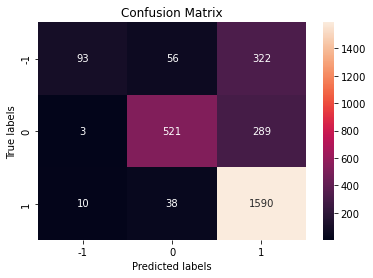

In [27]:
cf=metrics.confusion_matrix(y_test,lr.predict(tf_test))

ax= plt.subplot()
sns.heatmap(cf, annot=True, fmt='g', ax=ax);  #annot=counts appear in squares, ftm='g' removing hexadecimal system


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([-1,0,1]); ax.yaxis.set_ticklabels([-1,0,1]);

In [28]:
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

          -1       0.88      0.20      0.32       471
           0       0.85      0.64      0.73       813
           1       0.72      0.97      0.83      1638

    accuracy                           0.75      2922
   macro avg       0.82      0.60      0.63      2922
weighted avg       0.78      0.75      0.72      2922



Testing of model #2


In [29]:
dane2=pd.read_csv("George-31.10.csv")
dane2=dane2.rename(columns={"0": "Title",'1':"Author", "2":"Comment"})
dane2=dane2.drop(columns="Unnamed: 0")
dane2=dane2.iloc[:78]
def punc_clean(text): 
    import string as st
    a=[w for w in text if w not in st.punctuation]
    return ''.join(a)


        

def remove_stopword(text): 
    stopword=nltk.corpus.stopwords.words('english')
    stopword.append("")
    stopword.remove('not') 
    a=[w for w in nltk.word_tokenize(text) if w not in stopword]
    return ' '.join(a)

lista5=[]
for sentence3 in dane2.Comment:
    sentence3=html.unescape(sentence3)
    lista5.append(sentence3)
dane2["review"]=lista5
dane2['review'] = dane2['review'].apply(remove_stopword)
dane2['review'] = dane2['review'].apply(punc_clean)
dane2.review=dane2.review.str.lower()
lista6=[]
for i in dane2.review:
    lista6.append(demoji.replace(i,""))
dane2['review']=lista6

In [30]:
tf_test2=vectorizer.transform(dane2.review)

In [34]:
dane2['prediction']= lr.predict(tf_test2)

In [35]:
pd.set_option("display.max_colwidth", None)


In [36]:
dane2.prediction.value_counts()

 1    45
 0    31
-1     2
Name: prediction, dtype: int64